Copyright (C) 2023 201800294_DongilKim All rights reserved <U>_(https://KimTein.github.io)_</U>

Ch_15_assignment

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Equation Solving

## Importing Modules

In [2]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

## Inner Product

In [3]:
# Innvervect.py

import numpy as np

def innerVec(a,b):
    rowA = a.shape[0]
    rowB = b.shape[0]
    
    if (rowA != rowB):
        print('Wrong input data')
        return None
    
    c = 0.0
    for i in range(rowA):
        c += a[i]*b[i]
    return c

if __name__ == '__main__':
    a = np.array([1.1, 1.2, 1.3])
    b = np.array([2.1, 2.2, 2.3])
    
    c = innerVec(a, b)
    print("Inner product of vectors=", c)

Inner product of vectors= 7.940000000000001


In [4]:
# InnerVect2.py

import numpy as np

a = np.array([1.1, 1.2, 1.3])
b = np.array([2.1, 2.2, 2.3])

c = np.dot(a, b)
print("inner product = ", c)

inner product =  7.94


## Square Systems

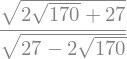

In [5]:
A = sympy.Matrix([[2, 3],[5, 4]])
B = sympy.Matrix([4, 3])

A.rank()

A.condition_number()

sympy.N(_)

A.norm()

In [6]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

np.linalg.matrix_rank(A)

np.linalg.cond(A)

np.linalg.norm(A)

2

### Gaussian Elimination

In [10]:
# GaussElimin.py
'''
x = GaussElimin(A, b)
    Equiation Ax=b
'''

import numpy as np

def GaussElimin(A, b):
    n = len(b)
    
    # Elimination
    for k in range(0, n-1):
        for i in range(k+1, n):
            if A[i, k ] != 0.0:
                lam = A[i, k] / A[k, k]
                A[i, k+1:n] -= lam * A[k, k+1:n]
                b[i] -= lam *b[k]
                
    # Substition
    for k in range(n-1, -1, -1):
        b[k] = (b[k] - np.dot(A[k, k+1:n], b[k+1:n])) / A[k, k]
        
    return b

'\nx = GaussElimin(A, b)\n    Equiation Ax=b\n'

In [8]:
# GaussElimin_examply.py
import numpy as np
from GaussElimin import *

if __name__ == '__main__':
    A = np.array([[6.0, -4.0, 1.0],
                 [-4.0, 6.0, -4.0],
                 [1.0, -4.0, 6.0]])
    b = np.array([-14.0, 36.0, 6.0])
    
    Aorg = A.copy()
    borg = b.copy()
    
    x = GaussElimin(A, b)
    
    print('\nresult: x=', x)
    print('\ncheck: Ax-b =', np.dot(Aorg, x) - borg)



result: x= [10. 22. 14.]

check: Ax-b = [ 1.77635684e-15  7.10542736e-15 -3.55271368e-15]


### LU decomposion

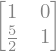

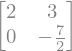

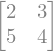

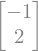

In [14]:
A = sympy.Matrix([[2, 3],[5, 4]])
b = sympy.Matrix([4, 3])
L, U, _ = A.LUdecomposition()

L

U
L*U

x = A.solve(b); x

In [16]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
P, L, U = la.lu(A)

L
U
P.dot(L.dot(U))

la.solve(A, b)

array([[1. , 0. ],
       [0.4, 1. ]])

array([[5. , 4. ],
       [0. , 1.4]])

array([[2., 3.],
       [5., 4.]])

array([-1.,  2.])

## Rectangular Systems

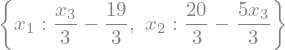

In [19]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1, 2, 3], [4, 5, 7]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])
sympy.solve(A*x - b, x_vars)

### Least-square solution

In [20]:
# la_lstsq_examply.py

import numpy as np
from scipy import linalg as linalg

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
 
A = np.vstack([x, np.ones(len(x))])
B = A.T
print(np.ones(len(x)))
print('\n', A)
print('\n', B)

sol, r, rank, sv = la.lstsq(B, y)
print(sol, r, rank, sv)

[1. 1. 1. 1.]

 [[0. 1. 2. 3.]
 [1. 1. 1. 1.]]

 [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
[ 1.   -0.95] 0.05 2 [4.10003045 1.09075677]


Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

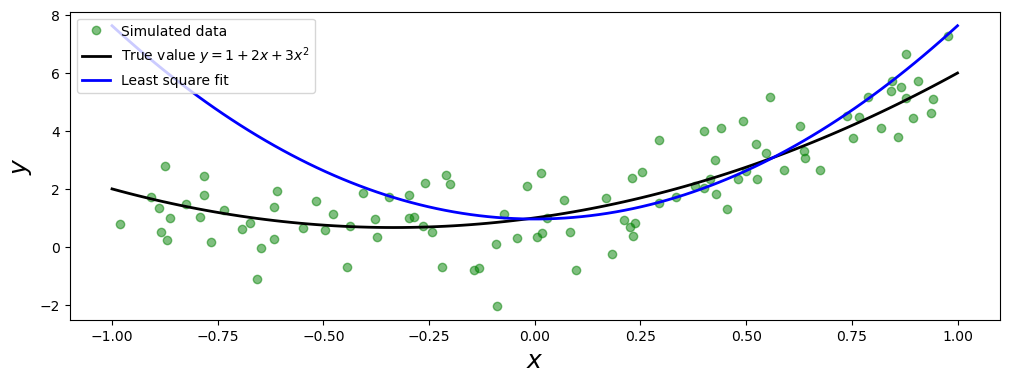

In [21]:
import matplotlib.pyplot as plt
# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# simulate noisy data
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# fit the data to the model using linear leqst square
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1] * sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha = 0.5, label = 'Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label = 'True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label ='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

Text(0.5, 0, '$x$')

Text(0, 0.5, '$y$')

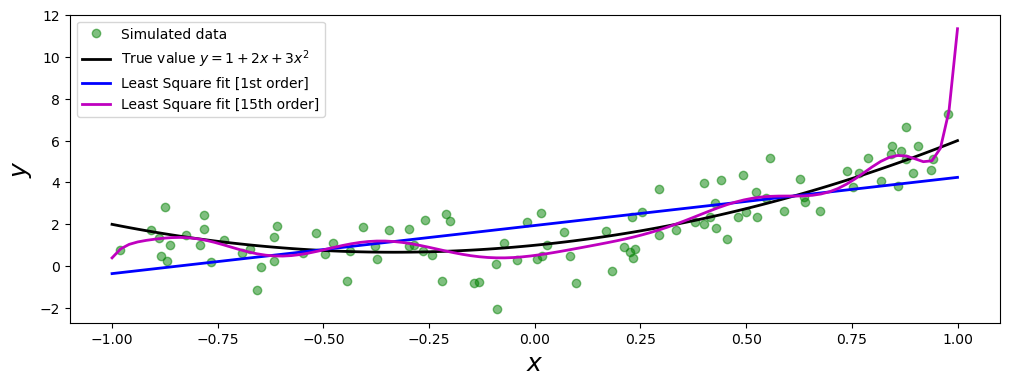

In [25]:
# fit the data to the model using linear least square:
# ist order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha = 0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least Square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least Square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

## Eigenvalue Problems

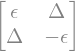

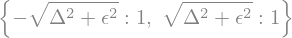

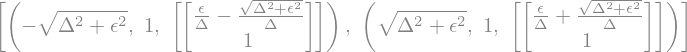

In [23]:
eps, delta = sympy.symbols("epsilon, Delta")
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

H.eigenvals()

H.eigenvects()

In [24]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
evals, evecs = la.eig(A)
evals

evecs

la.eigvalsh(A)

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

array([-1.75902942,  3.40592034, 13.35310908])


*****************************************************************************
Reference<br>
*    Title: Physics Programming Lecture Note (INU)
*    Author: Jeongwoo Kim, Ph.D.
*    Availability: https://sites.google.com/view/jeongwookim
  
****************************************************************************

Copyright (C) 2023 201800294_DongilKim All rights reserved <U>_(https://KimTein.github.io)_</U>